##Nature of the respondents

In [108]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [109]:
%matplotlib inline

In [110]:
summary = pd.read_csv("data/summary.dat")
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 36.0 MB


In [130]:
summary.columns

Index(['tucaseid', 'TUFINLWGT', 'TRYHHCHILD', 'TEAGE', 'TESEX', 'PEEDUCA',
       'PTDTRACE', 'PEHSPNON', 'GTMETSTA', 'TELFS', 
       ...
       't181501', 't181599', 't181601', 't181801', 't189999', 't500101',
       't500103', 't500105', 't500106', 't500107'],
      dtype='object', length=413)

In [131]:
summary['TESEX'].unique()

array(['FEMALE', 'MALE'], dtype=object)

In [132]:
Female = summary['TESEX'] == 2

In [133]:
Male = summary['TESEX'] == 1

In [177]:
summary['TESEX'][Female] = 'FEMALE'
summary['TESEX'][Male] = 'MALE'

## Male to Female Ratio in the Study

In [ ]:
gender = summary[['TESEX']]

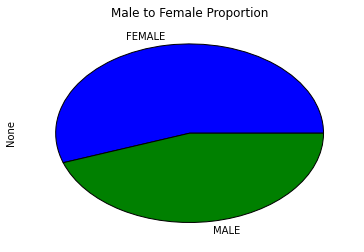

In [179]:
gender['TESEX'].value_counts().plot(kind='pie', title="Male to Female Proportion")

## Age Distribution

In [173]:
summary.columns
ages = summary[['TEAGE', 'TESEX']]

In [174]:
ages.loc[ages.TEAGE >= 60,'age_group']='60+'
above50 = ages.TEAGE >= 50 
below60 = ages.TEAGE < 60
ages.loc[above50 & below60, 'age_group'] = '50-59'

above40 = ages.TEAGE >= 40
below50 = ages.TEAGE < 50

above30 = ages.TEAGE >= 30
below40 = ages.TEAGE < 40

above20 = ages.TEAGE >= 20
below30 = ages.TEAGE < 30

ages.loc[above40 & below50, 'age_group'] = '40-49'
ages.loc[above30 & below40, 'age_group'] = '30-39'
ages.loc[above20 & below30, 'age_group'] = '20-29'
ages.loc[ages.TEAGE < 20, 'age_group'] = '0-20'

/Users/sovello/tiy2015/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/core/indexing.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/sovello/tiy2015/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/core/indexing.py:407: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [175]:
age_groups = ages.loc[:,['age_group', 'TESEX', 'counts']]
df2 = age_groups.groupby(['age_group', 'TESEX'])['age_group'].count().unstack('TESEX')#.fillna(0)

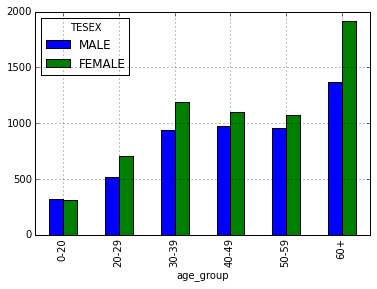

In [176]:
df2[['MALE', 'FEMALE']].plot(kind='bar')

In [ ]:
## Respondents Nature of 

In [57]:
respondents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 175 entries, TUCASEID to TXTONHH
dtypes: float64(1), int64(172), object(2)
memory usage: 15.3+ MB
